In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anomalous_url.txt
/kaggle/input/normal_url.txt


In [4]:
# term frequency–inverse document frequency
# merge + label
def load_data(file):
    with open(file, 'r', encoding='utf-8') as f:
        data = f.readlines()
    result = []
    for d in data:
        d = d.strip()
        if len(d) > 0:
            result.append(d)
    return result

normal_requests = load_data('/kaggle/input/anomalous_url.txt')
anomalous_requests = load_data('/kaggle/input/normal_url.txt')

all_requests = normal_requests + anomalous_requests
y_normal = [0] * len(normal_requests)
y_anomalous = [1] * len(anomalous_requests)
y = y_normal + y_anomalous

In [6]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, analyzer="word", sublinear_tf=True)
X = vectorizer.fit_transform(all_requests)
print(vectorizer.vocabulary_)

{'get': 18621, 'http': 19911, 'localhost': 22120, '8080': 8188, 'tienda1': 29775, 'publico': 26410, 'anadir': 10902, 'jsp': 20869, 'id': 20086, 'nombre': 24514, 'jamn': 20606, 'ibrico': 20071, 'precio': 26243, '85': 8503, 'cantidad': 13718, 'drop': 16404, 'table': 29338, 'usuarios': 30506, 'select': 28310, 'from': 18142, 'datos': 15736, 'where': 31404, 'like': 21919, 'b1': 11782, 'aadir': 9815, 'al': 10304, 'carrito': 13909, 'post': 26180, '49': 5573, 'asf': 11479, 'logo': 22144, 'wide': 31424, 'gif': 18660, 'autenticar': 11645, 'modo': 23592, 'entrar': 17019, 'login': 22139, 'bob': 12743, 'script': 28241, 'alert': 10516, 'paros': 25398, 'parosproxy': 25399, 'org': 24963, 'pwd': 26501, '84m3ri156': 8501, 'remember': 27010, 'on': 24869, 'grimshaw': 19048, 'lac': 21408, 'iar': 20053, 'remembera': 27011, 'caracteristicas': 13780, 'ida': 20087, 'errormsg': 17128, 'errormsga': 17129, 'credenciales': 15320, 'incorrectas': 20247, 'iissamples': 20147, 'sdk': 28246, 'asp': 11501, 'applications'

In [8]:
X  # it's a huge matrix

<61064x31967 sparse matrix of type '<class 'numpy.float64'>'
	with 986479 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2,random_state=0).fit(X)
y_pred_km = km.predict(X)
y_pred_km

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

0.8941877794336811
0.25
0.3907521979811136
[[23999  1065]
 [27000  9000]]


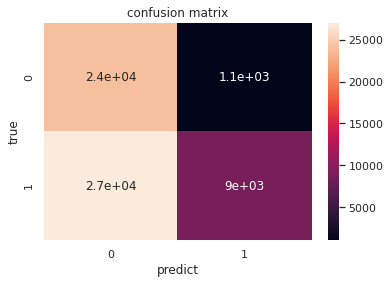

In [10]:
# validation
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y, y_pred_km))
print(recall_score(y, y_pred_km))
print(f1_score(y, y_pred_km))

# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def draw_cm(y_test, y_predict):
    sns.set()
    f,ax=plt.subplots()
    C1= confusion_matrix(y_test, y_predict, labels = [0, 1])
    print(C1)
    sns.heatmap(C1,annot=True,ax=ax) # hot plot display

    ax.set_title('confusion matrix') 
    ax.set_xlabel('predict')
    ax.set_ylabel('true')
    
draw_cm(y, y_pred_km)